# Ising Machine

This notebook aims to be the first exposure to the Ising machine via Kuramoto model for connected non-linear oscillators.

In [1]:
import numpy as np
from scipy.integrate import odeint
import sdeint

import matplotlib.pyplot as plt

### Stochastic differential equation of 2-params

the equation is

$$d\mathbf{x} = A \mathbf{x} dt + B d\mathbf{W}$$

where $x = (x_1,x_2)$ as well as $dW$ with the initial condition $\mathbf{x}_0 = (3.0,2.0)$

In [2]:
A = np.array([[-0.5, -2.0],
              [ 2.0, -1.0]])

B = np.diag([0.5, 0.5]) # diagonal, so independent driving Wiener processes

tvec = np.linspace(0.,15.,1001)
x0 = [3.0,2.0]

def f(x,t):
    return A.dot(x)
def g(x,t):
    return B

In [3]:
result = sdeint.itoint(f,g,x0,tvec)

In [4]:
result.shape

(1001, 2)

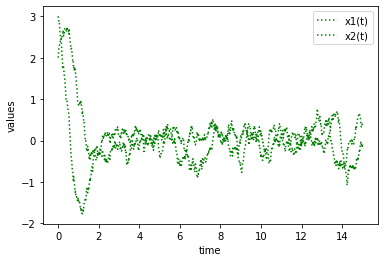

In [5]:
# plot results
plt.plot(tvec,result[:,0],'g:',label='x1(t)')
plt.plot(tvec,result[:,1],'g:',label='x2(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Kuramoto Model

It is a coupled oscillator model which could be used to mimick the Ising model via injected phase locking. The phase locking ensures the phase difference between the oscillators to be equal to either $0$ or $\pi$, as will be clear later.

In the presence of a Gaussian white noise the SDE takes the form:

$d \phi_{it} =\Big[ A_c \sum_j J_{ij} \sin (\phi_{it}-\phi_{jt}) - A_s  \sin (2 \phi_{it})\Big] dt + A_n d W_{t}, \quad i \in \{1,..,M\}$

Assuming $A_s > A_c$ for positive constants

We can now choose the suitable $J_{ij}$ matrix based on the optimization problem and solve for it.

One can also consider the steady-state response via $d\phi_i/dt = 0$, then it also means the equilibrium solution if the concerning fixed point is an attractor. Then, one can do the statistical mechanics of the Gibbs ensemble with a Boltzmann distribution for the micro-states,

$$P_i = \frac{e^{-\beta E_i }}{\sum_{j=1}^{M} e^{-\beta E_j }}$$

Yet, we would like to see how arbitrary initial states leads to the correct results.


Therefore, it is a good idea to do extend the code above for the model of our concern. Even if $A_s$ and $A_n$ are problem independent (at least on theory), $J_{ij}$ does change. We therefore focus on two problems (to be generalized).

### Implementation of the following article 
A. Lucas, “Ising formulations of many NP problems,” Front. Phys., vol. 2, 2014, Art. no. 5, doi: 10.3389/fphy.2014.00005.

## 1. Partitioning Problems

### 1.1 Number Partitioning Problem

The aim of this combinatorial problem is to divide a set of numbers in a given set into to such that the total sum of each are equal to each other. We aim to design the Ising Hamiltonian with the groundstate providing the correct answer given the set, $n_i \in S$.

The Hamiltonian is,

\begin{eqnarray}
H &=& A_c \Big( \sum_{i}^N n_i s_i  \Big)^2, \quad \text{with} \quad s_i \in \pm 1, A_c > 0\\
&=&  A_c \Big(\sum_{i}^N n_i^2 s_i^2 + \sum_{i\ne j}^N n_i n_j s_i s_j\Big),\\
&=& A_c \frac{N(N+1)(2N+1)}{6} + A_c \sum_{i\ne j}^N J_{ij} s_i s_j, \quad \text{with} \quad J_{ij} \equiv n_i n_j, \quad \text{and omit the constant},\\
&=& A_c \sum_{i\ne j}^N J_{ij} s_i s_j.
\end{eqnarray}

We are going to simulate this system with an injected phase-locking and the noise terms as follows,

$d \phi_{it} =\Big[ A_c \sum_j J_{ij} \sin (\phi_{it}-\phi_{jt}) - A_s  \sin (2 \phi_{it})\Big] dt + A_n d W_{t}, \quad i \in \{1,..,M\}$

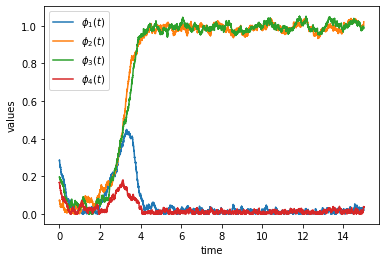

In [8]:
M = 4

b1 = np.reshape(np.arange(1,M+1),(M,1))
J = b1.dot(b1.T)
J = J - np.diag(np.diag(J))
J = J / J.max()
pi = np.pi

Ac = 5.
As = 2.
An = 0.20

B = np.diag(An*np.ones((M,))) # diagonal, so independent driving Wiener processes
tmax = 15.
tvec = np.linspace(0.,tmax,10001)
x0 = np.random.rand(M,)

def f(x,t):
    return (0.1+Ac*t/tmax)*np.sin(x)*sum(J.dot(np.cos(x)))-(0.1+Ac*t/tmax)*np.cos(x)*sum(J.dot(np.sin(x)))-As*np.sin(2*x)
def g(x,t):
    return B

result = sdeint.itoint(f,g,x0,tvec)
result.shape

# plot results
for indP in np.arange(M):
    plt.plot(tvec,abs(result[:,indP])/pi,label='$\phi_'+str(indP+1)+'(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend()
plt.show()

Indeed, the Ising Hamiltonian has a $\mathcal{Z}_2$ symmetry. We fix the first spin, $s_1 = 1$.

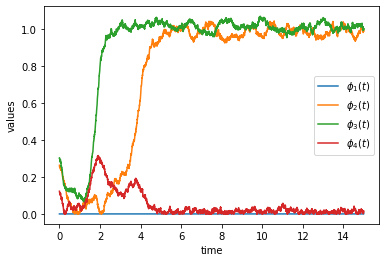

In [12]:
M = 4

J0 = J+J.T
b1 = np.reshape(np.arange(1,M+1),(M,1))
J = b1.dot(b1.T)
J = J - np.diag(np.diag(J))
J = J / J.max()*2
pi = np.pi
Ac = 5.
As = 2.
An = 0.20

B = np.diag(An*np.ones((M,))) # diagonal, so independent driving Wiener processes
tmax = 15.
tvec = np.linspace(0.,tmax,5001)
x0 = np.random.rand(M,)

def f(x,t):
    x[0] = 0.
    return (0.1+Ac*t/tmax)*np.sin(x)*sum(J.dot(np.cos(x)))-(0.1+Ac*t/tmax)*np.cos(x)*sum(J.dot(np.sin(x)))-As*np.sin(2*x)
def g(x,t):
    return B

result = sdeint.itoint(f,g,x0,tvec)
result.shape

# plot results
for indP in np.arange(M):
    plt.plot(tvec,abs(result[:,indP])/pi,label='$\phi_'+str(indP+1)+'(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend()
plt.show()

Comparing the two plots, gauge fixing accelerates the convergence time.

### 1.2 Graph-Partitioning Problem

Given a graph $G = (V,E)$ with $N= |V| $ even number of vertices.

Question is: "what is a partition of the set $V$ into two subsets of equal size $N/2$ such that the number of edges connecting the two subsets is minimized?"

The Hamiltonian is,

\begin{eqnarray}
H &=& A_c \Big( \sum_{i}^N s_i  \Big)^2 + B \sum_{(ij) \in E} \frac{1-s_i s_j}{2}, \quad \text{with} \quad \frac{A_c}{B} \ge \frac{min(2 \Delta, N)}{8}.
\end{eqnarray}

The first term penalizes the unequal partitioning ($A_c > 0$) whereas the second is to penalize spin flip between the edges, i.e. minimize the number of connecting edges when $B > 0$.

In [13]:
import random

M = 8
pi = np.pi
h = np.zeros((M,1))
Ac = 5.
As = 4.
An = 0.10
Bc = .5

b1 = np.random.rand(M,1)
JA= b1.dot(b1.T)
JA = JA - np.diag(np.diag(JA))

JB = Bc/Ac/2.*(np.eye(M)-np.ones((M,M)))

J = JA + JB

for ind in np.arange(np.fix(np.prod(J.shape)/3)):
    J[random.randint(0, J.shape[0]-1),random.randint(0, J.shape[1]-1)] = 0

In [14]:
print(np.fix(100*J)/100.)

[[ 0.    0.    0.   -0.04  0.   -0.04 -0.04 -0.04]
 [-0.04  0.    0.16  0.    0.33  0.    0.04  0.28]
 [-0.04  0.    0.    0.39  0.44  0.    0.06  0.37]
 [-0.04  0.29  0.39  0.    0.75  0.54  0.14  0.64]
 [-0.04  0.33  0.    0.75  0.    0.6   0.16  0.  ]
 [-0.04  0.23  0.    0.54  0.6   0.    0.1   0.51]
 [-0.04  0.    0.    0.14  0.16  0.1   0.    0.  ]
 [-0.04  0.28  0.37  0.    0.71  0.51  0.13  0.  ]]


The graph has the following structure.

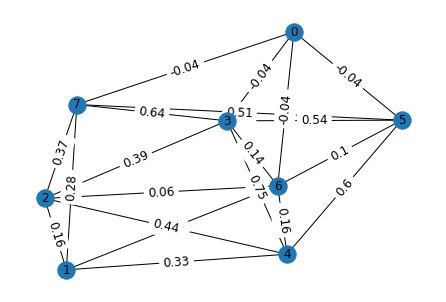

In [15]:
import networkx as nx   

# Create a graph
G = nx.Graph()

# distances
D = J
labels = {}
for n in range(len(D)):
    G.add_node(n)
    for m in range(len(D)-(n+1)):
        if np.fix(100*D[n][n+m+1])/100 != 0.:
            G.add_edge(n,n+m+1)
            labels[ (n,n+m+1) ] = str(np.fix(100*D[n][n+m+1])/100)

pos=nx.spring_layout(G)

#fig = plt.figure(1, figsize=(600, 600))
nx.draw(G, pos,with_labels = 'True')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=12)

import pylab as plt
plt.show()

In [16]:
B = np.diag(An*np.ones((M,))) # diagonal, so independent driving Wiener processes
tmax = 10.
tvec = np.linspace(0.,tmax,10001)
x0 = np.random.rand(M,)

def f(x,t):
    return (0.01+Ac*t/tmax)*np.sin(x)*sum(J.dot(np.cos(x)))-(0.01+Ac*t/tmax)*np.cos(x)*sum(J.dot(np.sin(x)))\
            -As*np.sin(2*x)
def g(x,t):
    return B

We generated a random graph, combined with the second term insuring the minimum size of spin-flipping edges.

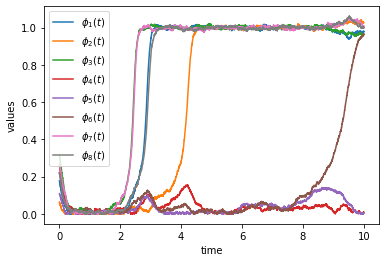

In [17]:
result = sdeint.itoint(f,g,x0,tvec)
result.shape

# plot results
for indP in np.arange(M):
    plt.plot(tvec,abs(result[:,indP])/pi,label='$\phi_'+str(indP+1)+'(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend()
plt.show()

In [18]:
result.shape

(10001, 8)

In [19]:
np.round(abs(result[-1,:]/pi))

array([1., 1., 1., 0., 0., 1., 1., 1.])

In [20]:
values = np.round(abs(result[-1,:]/pi))

We can now color the partitions

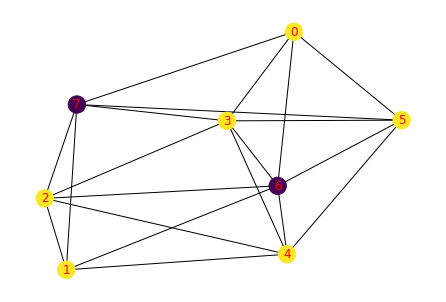

In [21]:
nx.draw(G, pos,cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='red')

import pylab as plt
plt.show()

### 1.3 Cliques Problem

This problem determines a subset of vertices of size K where all-to-all connectivity is present.

Define a binary bit as: $x_i = \frac{s_i +1}{2}$ for the spin variable at each vertex (node) $s_i \in \pm 1$.

If we choose,
$$H = A \left( K - \sum_\nu x_\nu \right)^2 + B \left[ \frac{K(K-1)}{2} - \sum_{(u \nu) \in E} x_u x_\nu \right], \quad A,B \ge 1. $$

The first term is minimized when only K vertices are $1$. Ensuring $K$ vertices, we now need to select the ones which has all-to-all connectivity. The second term searches through all edges and is equal to zero when there are only $K(K-1)/2$ edges present. The common sub-set of the two terms are minimized when the Hamiltonian has a zero mode, otherwise the answer to the initially posed question is 'no.'

Or, let us assume there are only $n$ of $x_i = 1$. Then the Hamiltonian becomes, 

\begin{eqnarray}
H(0) &=& A (n-K)^2 + B \left[ \frac{K(K-1) - n(n-1)}{2} \right],\\
&=& (n-K)\left[A (n-K) - B \left( \frac{n+K-1}{2} \right)\right]
\end{eqnarray}

As can bee seen above, $H(n) = 0$ is satisfied for two different values,
- $n = K$,
- $n = \frac{2 A K \pm BK+ B (K-1)}{2A-B} = K + \frac{2 K - 1}{2A/B-1}$. 

Note that it is not an integer as long as $2A/B-1 \ne \frac{2 K - 1}{m}$, thereby as long as $2 A/B \ne 1+\frac{2 K - 1}{m}$
- Note that, if $n = 1+K$, $H(1+K) = A - KB$. Therefore, we must also choose $A > KB$.

Let us now explicitly write down the Hamiltonian and calculate the Ising weights and the external field.

\begin{eqnarray}
H &=& A\left( K^2 - 2 K \sum_\nu x_\nu + \sum_{u\nu} x_u x_\nu \right) + B \left[ \frac{K(K-1)}{2} - \sum_{(u \nu) \in E} x_u x_\nu \right] \\
&=& A K^2 + B \frac{K(K-1)}{2} + (A-B) \sum_{(u \nu) \in E} x_u x_\nu - 2 A K \sum_\nu x_\nu 
\end{eqnarray}


We need to solve the following schotastic equation with an external field.

$d \phi_{it} =\Big[ A_c \sum_j J_{ij} \sin (\phi_{it}-\phi_{jt}) + A_t \sum_i h_{i} \sin (\phi_{it}) - A_s  \sin (2 \phi_{it})\Big] dt + A_n d W_{t}, \quad i \in \{1,..,M\}$

Then, $J_{ij} = 1$, $h_i = 1$, $\phi_{it} = \pi x_i (t)$.

We choose $A = 2 B K$, $A_t = -2 A K$, $A_c = A-B$ with an unnecessary constant term that vanishes for the differential form $cons. = A K^2 + B \frac{K(K-1)}{2}$.

In [304]:
import random

M = 12  # number of total vertices
K = 4  # clique number
pi = np.pi
h = np.ones((M,1)),

B = 1.
A = 2*(B*K)
Ac = (A-B)
As = 2*Ac
At = -2*A*K

An = 0.05*Ac

J = np.ones((M,M))
J = np.random.rand(M,M)/500.
J[J >= 1e-3] = 1.
J[J < 1e-3] = 0.
J = J - np.diag(np.diag(J))

J[2:K+2,2:K+2] = 1.

In [305]:
J[2:K+2,2:K+2].shape

(4, 4)

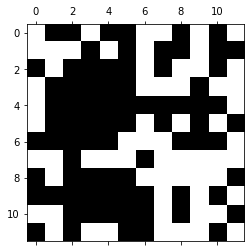

In [306]:
plt.spy(J)

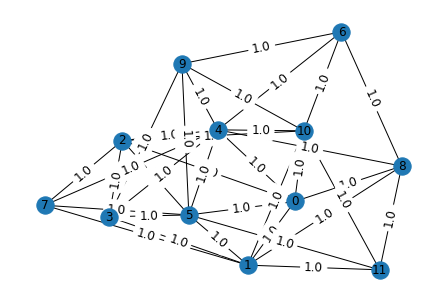

In [307]:
import networkx as nx   

# Create a graph
G = nx.Graph()

# distances
D = J
labels = {}
for n in range(len(D)):
    G.add_node(n)
    for m in range(len(D)-(n+1)):
        if D[n][n+m+1] > 1e-3:
            G.add_edge(n,n+m+1)
            labels[ (n,n+m+1) ] = str(np.fix(100*D[n][n+m+1])/100)

pos=nx.spring_layout(G)

#fig = plt.figure(1, figsize=(600, 600))
nx.draw(G, pos,with_labels = 'True')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=12)

import pylab as plt
plt.show()

In [308]:
B = np.diag(An*np.ones((M,))) # diagonal, so independent driving Wiener processes
tmax = M*3.
tvec = np.linspace(0.,tmax,2000*M+1)
x0 = np.random.rand(M,)

def f(x,t):
    x[2] = np.pi
    return (Ac*t/tmax)*np.sin(x)*sum(J.dot(np.cos(x)))-(Ac*t/tmax)*np.cos(x)*sum(J.dot(np.sin(x)))\
            -As*np.sin(2*x) + At*np.sin(x)
def g(x,t):
    return B

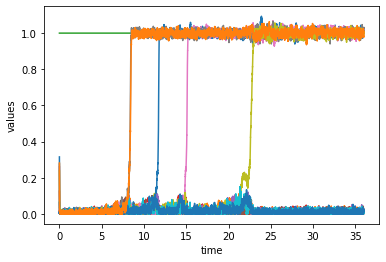

In [309]:
result = sdeint.itoint(f,g,x0,tvec)
result.shape

# plot results
for indP in np.arange(M):
    plt.plot(tvec,abs(result[:,indP])/pi,label='$\phi_'+str(indP+1)+'(t)$')
plt.ylabel('values')
plt.xlabel('time')
#plt.legend()
plt.show()

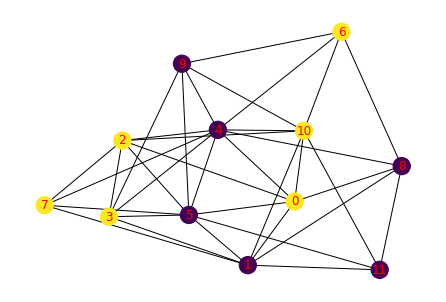

In [310]:
values = np.round(abs(result[-1,:]/pi))
nx.draw(G, pos,cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='red')

import pylab as plt
plt.show()

The result is problematic. It is probably the parameters that must be chosen appropriately for a successful annealing.